In [1]:
!pip3 install fredapi > /dev/null

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key ='8f0cd38bc95ae329419a64684bd6346f'


In [10]:
# 1. create a Fred object

Fred(api_key=fred_key)

In [14]:
# 2. search for economic data series

fred = Fred(api_key=fred_key)

fred.search("S&P 500")


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2025-07-15,2025-07-15,S&P 500,2015-07-15,2025-07-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-14 19:02:00-05:00,83,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2025-07-15,2025-07-15,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2025-07-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-15 08:36:08-05:00,54,"Copyright, 2016, Chicago Board Options Exchang..."
MEHOINUSA646N,MEHOINUSA646N,2025-07-15,2025-07-15,Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:03-05:00,72,Household data are collected as of March. As ...
STLFSI,STLFSI,2025-07-15,2025-07-15,St. Louis Fed Financial Stress Index (DISCONTI...,1993-12-31,2020-03-13,"Weekly, Ending Friday",W,Index,Index,Not Seasonally Adjusted,NSA,2020-03-19 09:00:02-05:00,32,The methodology for the St. Louis Fed's Financ...
MEHOINUSCAA646N,MEHOINUSCAA646N,2025-07-15,2025-07-15,Median Household Income in California,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:03-05:00,56,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEHOINUSDEA646N,MEHOINUSDEA646N,2025-07-15,2025-07-15,Median Household Income in Delaware,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:20-05:00,5,Household data are collected as of March. As ...
MEHOINUSMSA646N,MEHOINUSMSA646N,2025-07-15,2025-07-15,Median Household Income in Mississippi,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:23-05:00,4,Household data are collected as of March. As ...
MEHOINUSHIA646N,MEHOINUSHIA646N,2025-07-15,2025-07-15,Median Household Income in Hawaii,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:23-05:00,3,Household data are collected as of March. As ...


In [15]:

fred = Fred(api_key=fred_key)

In [19]:
sp_search = fred.search("S&P 500", order_by='popularity')
sp_search.shape

(101, 15)

In [21]:
# 3 Pull raw data

sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

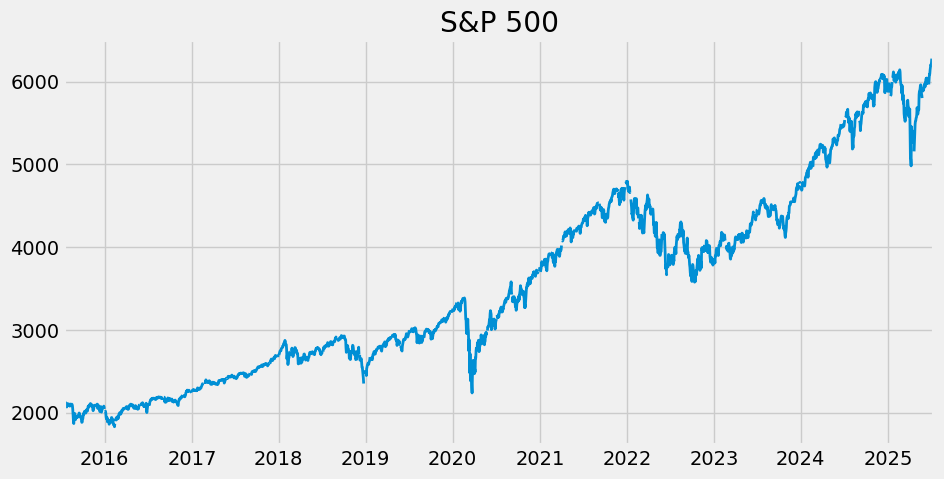

In [24]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

In [25]:
#4 pull and join multipole data series

unemp_results =fred.search('unemployment')

In [ ]:
unrate = fred.get_series('UNRATE')

<Axes: >

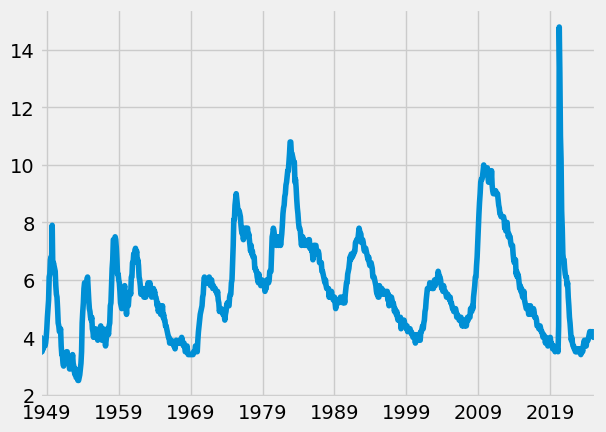

In [29]:
unrate.plot()

In [26]:
unemp_results  

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-15,2025-07-15,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-07-15,2025-07-15,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 07:47:54-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-07-15,2025-07-15,Unemployment Level,1948-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-07-03 07:48:40-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-07-15,2025-07-15,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-07-15,2025-07-15,Continued Claims (Insured Unemployment),1967-01-07,2025-06-28,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-07-10 07:33:02-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC317430010,ENUC317430010,2025-07-15,2025-07-15,"Total Quarterly Wages in Manhattan, KS (MSA)",2013-01-01,2024-10-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2025-06-04 11:20:23-05:00,1,Total wages are the wages paid by Unemployment...
IPUEN3116L020000000,IPUEN3116L020000000,2025-07-15,2025-07-15,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2025-04-24 15:24:03-05:00,1,"Labor compensation, defined as payroll plus su..."
IPUEN3116U110000000,IPUEN3116U110000000,2025-07-15,2025-07-15,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2025-04-24 15:24:02-05:00,1,"Labor compensation, defined as payroll plus su..."


In [1]:
num1 = 7
num2 = 2
result = num1 / num2
print(result)

3.5


In [2]:
print(10 // 3)

3


In [4]:
numbers = [10, 20, 30, 40]
numbers.append(50)
numbers.remove(20)
print(numbers)

[10, 30, 40, 50]


In [5]:
letters = ['a', 'b', 'c', 'd', 'e']
print(letters[1:4])

['b', 'c', 'd']


In [6]:
list1 = ['x', 'y']
list2 = ['z']
result = list1 + list2 * 2
print(result)


['x', 'y', 'z', 'z']


In [7]:
words = ["cat", "dog", "elephant"]
result = [word.upper() for word in words if len(word)>3]
print(result)

['ELEPHANT']


In [9]:
x = 13
y = 10
c = x + y

print(c)

23


In [10]:
my_list = [1, 2, 3, 4, 5]
new_list = [x * 2 for x in my_list if x % 2 == 0]
print(new_list)

[4, 8]


In [11]:
my_tuple = (1, 2, 3, 4)
my_list = list(my_tuple)
my_list.append(5)
print(my_list)

[1, 2, 3, 4, 5]


In [1]:
a = 10
b = 5
result = a // b + a % b
print(result)

2


In [ ]:
age = int(input("Enter your age:"))

if age >= 18:
    print("You are signed up!")
elif age < 0:
    print("you haven't been born yet")
elif age >= 100:
    print("You are too old to sign up")
else: 
    print("You musht be 18+ to sign up")

you haven't been born yet


In [10]:
response = input("Would you like food? (Y/N): ")

if response == "Y" or "y":
    print("Have some food!")
else:
    print("No food for you!")

Have some food!


In [12]:
for_sale = True

if for_sale: 
    print("This item is for sale!")
else:
    print("This item is NOT for sale!")

This item is for sale!


In [13]:
x = 8
y = 3
if x > 5 and y < 5:
    print('Condition met')
else:
    print('Condition not met')

Condition met


In [14]:
x = 25
if x > 10:
    if x < 30:
        print('x is between 10 and 30')
    else:
        print('x is 30 or more')
else:
    print('x is 10 or less')

x is between 10 and 30


In [15]:
if True:
print('Hello')
    print('World')

IndentationError: expected an indented block after 'if' statement on line 1 (2462206045.py, line 2)

In [16]:
number = 15
if number > 20:
    print('Greater than 20')
elif number > 10:
    print('Greater than 10')
else:
    print('10 or less')

Greater than 10


In [17]:
num = 8
if num > 0:
    if num % 2 == 0:
        print('Positive and even')
    else:
        print('Positive and odd')
else:
    print('Not positive')

Positive and even


In [18]:
score = 85
if score >= 90:
    print('Grade: A')
elif score >= 80:
    print('Grade: B')
else:
    print('Grade: C')

Grade: B


In [25]:
secret_PIN = 1234
int(input("What is your PIN? "))
bal = 500

if PIN == secret_PIN:
    print("Valid PIN")
    amount = int(input("How much would you like to withdraw? "))
    if amount <= bal:
        print("Money issued")
    elif amount > bal:  
        print("You do not have enough money.")
else:
    print("Error")


Valid PIN
You do not have enough money.
